In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

In [2]:
# Database connection settings
conn = psycopg2.connect(
    host="localhost",
    database="coffee_sales_db",
    user="peri****",
    password="*****"
)

/var/folders/1n/57rm2l9j63l16w8qp2v43lh80000gn/T/ipykernel_31689/1810279734.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


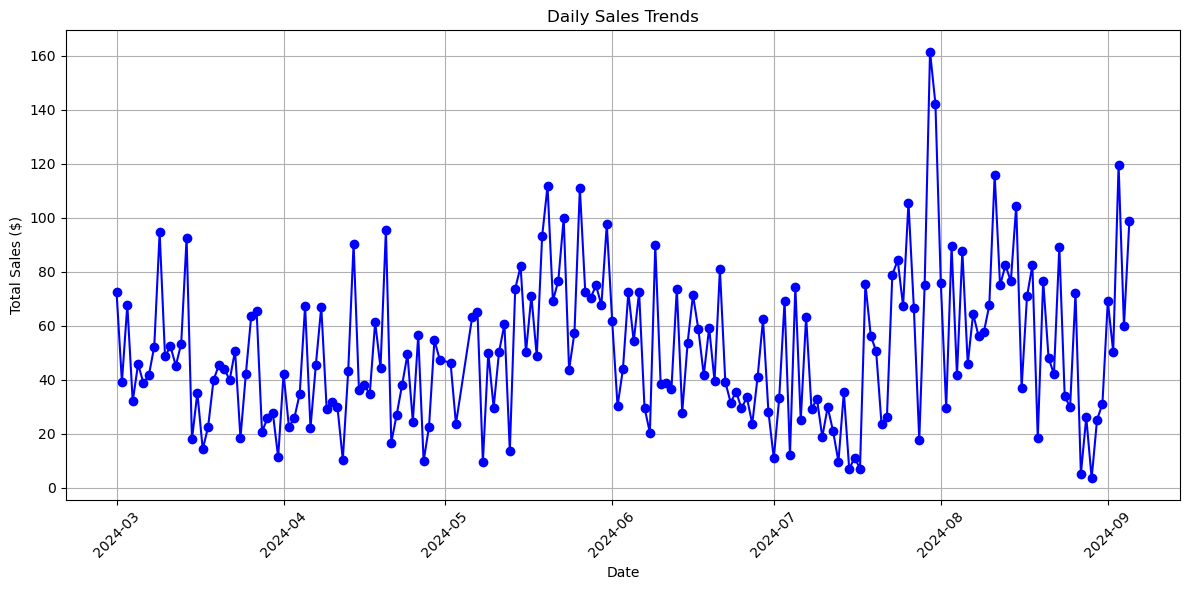

In [3]:
# Daily Sales Trend Visualization
def plot_daily_sales_trends():
    query = """
        SELECT date, SUM(money) AS daily_sales
        FROM coffee_sales
        GROUP BY date
        ORDER BY date;
    """
    df = pd.read_sql_query(query, conn)

    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['daily_sales'], marker='o', linestyle='-', color='b')
    plt.title('Daily Sales Trends')
    plt.xlabel('Date')
    plt.ylabel('Total Sales ($)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_daily_sales_trends()

/var/folders/1n/57rm2l9j63l16w8qp2v43lh80000gn/T/ipykernel_31689/509659748.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


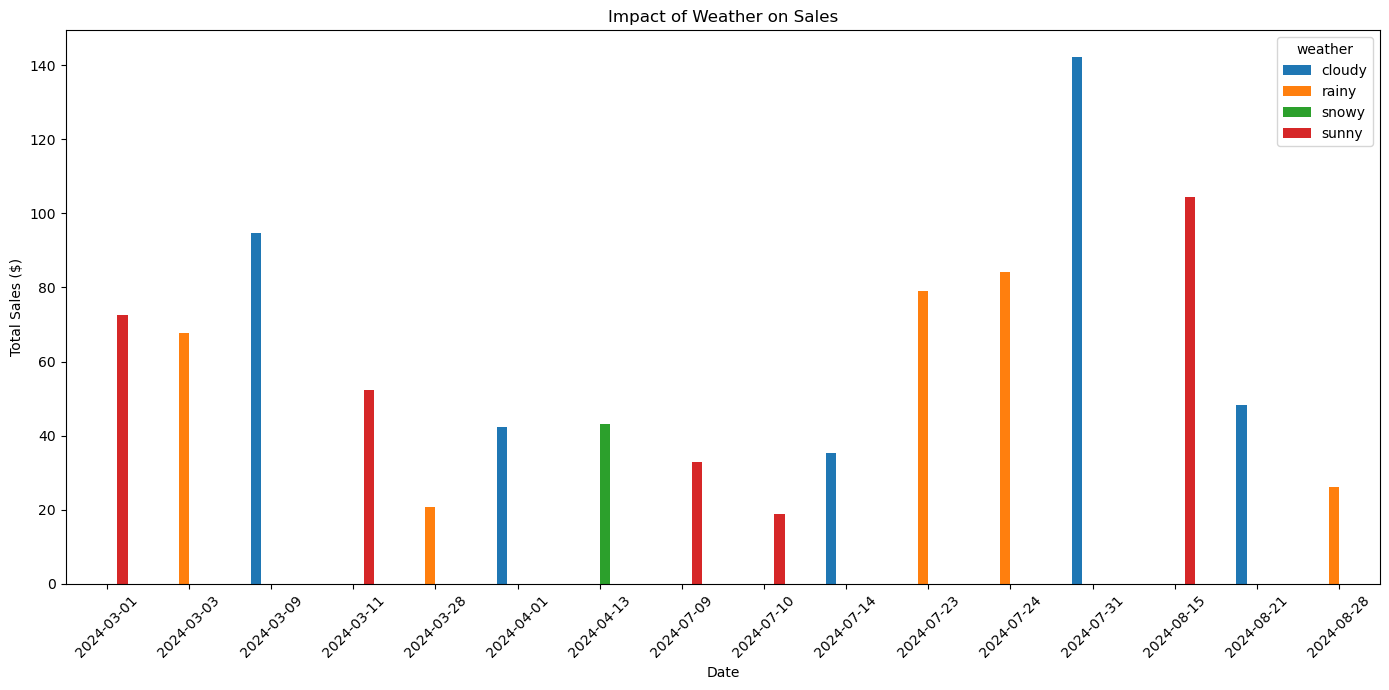

In [4]:
# Weather Impact on Sales Visualization
def plot_weather_impact_on_sales():
    query = """
        SELECT a.date, a.weather, b.total_sales
        FROM weather_data a
        JOIN (SELECT date, SUM(money) AS total_sales FROM coffee_sales GROUP BY date) b
        ON a.date = b.date;
    """
    df = pd.read_sql_query(query, conn)
    
    # Create a pivot table to prepare data for grouped bar chart
    pivot_df = df.pivot(index='date', columns='weather', values='total_sales')
    
    pivot_df.plot(kind='bar', figsize=(14, 7))
    plt.title('Impact of Weather on Sales')
    plt.xlabel('Date')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_weather_impact_on_sales()

/var/folders/1n/57rm2l9j63l16w8qp2v43lh80000gn/T/ipykernel_31689/25187603.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


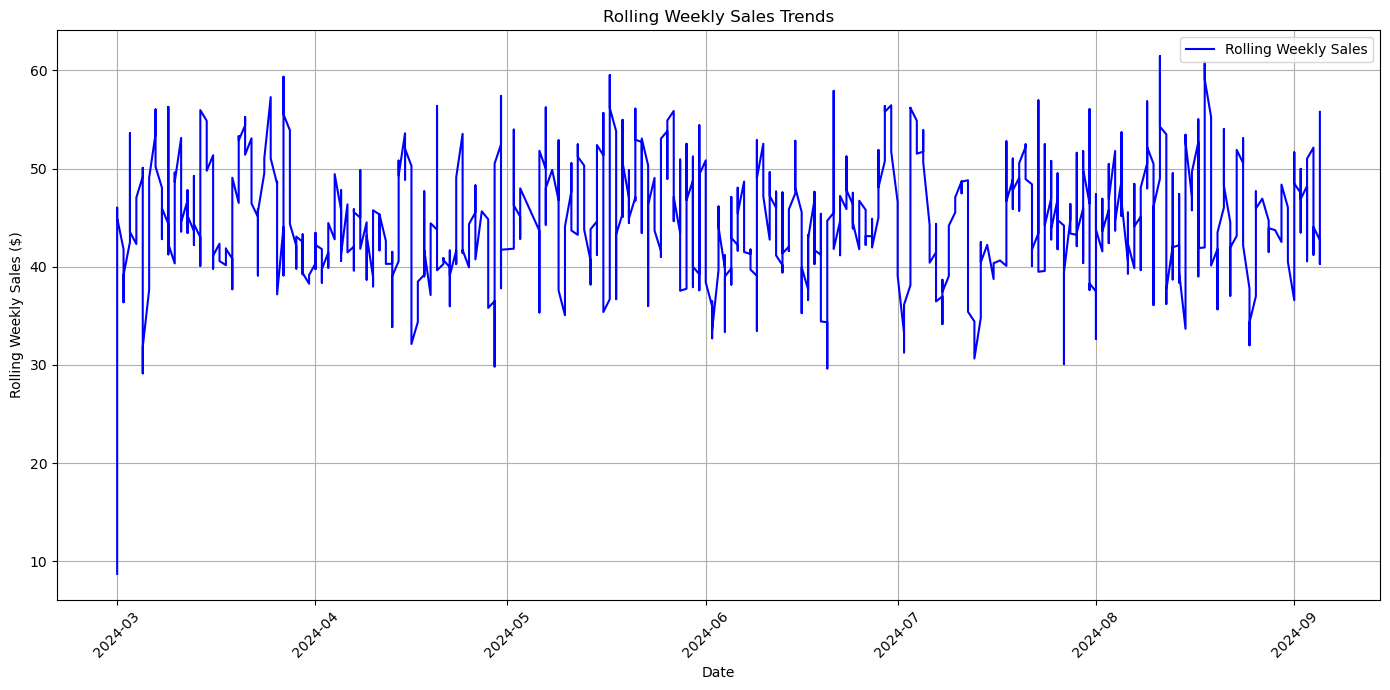

In [8]:
# Rolling Weekly Sales Visualization
def plot_rolling_weekly_sales():
    query = """
        SELECT date, SUM(money) OVER (ORDER BY date ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS rolling_weekly_sales
        FROM coffee_sale
        ORDER BY date;
    """
    df = pd.read_sql_query(query, conn)
    
    plt.figure(figsize=(14, 7))
    plt.plot(df['date'], df['rolling_weekly_sales'], marker='', linestyle='-', color='b', label='Rolling Weekly Sales')
    plt.title('Rolling Weekly Sales Trends')
    plt.xlabel('Date')
    plt.ylabel('Rolling Weekly Sales ($)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_rolling_weekly_sales()